In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt

In [2]:
def display_random_images_with_labels(image_dir, label_dir, num_images=12):
    """
    Display a random set of images from a directory along with YOLO labels inline in a Jupyter notebook as a grid.

    Args:
        image_dir (str): Path to the directory containing images.
        label_dir (str): Path to the directory containing YOLO format label files.
        num_images (int): Number of random images to display. Default is 11.
    """
    # Get a list of all image files in the image directory
    image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(('png', 'jpg', 'jpeg'))]

    if len(image_files) == 0:
        print("No images found in the specified directory.")
        return

    # Select a random subset of image files
    selected_images = random.sample(image_files, min(num_images, len(image_files)))

    # Calculate grid size
    grid_cols = 4
    grid_rows = (len(selected_images) + grid_cols - 1) // grid_cols

    fig, axes = plt.subplots(grid_rows, grid_cols, figsize=(16, 4 * grid_rows))
    axes = axes.flatten()

    for idx, (image_file, ax) in enumerate(zip(selected_images, axes)):
        # Load the image
        image_path = os.path.join(image_dir, image_file)
        image = cv2.imread(image_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Load the corresponding label file
        label_file = os.path.join(label_dir, os.path.splitext(image_file)[0] + '.txt')

        if os.path.exists(label_file):
            with open(label_file, 'r') as f:
                labels = f.readlines()

            # Parse and draw bounding boxes from YOLO labels
            h, w, _ = image.shape
            for label in labels:
                parts = label.strip().split()
                if len(parts) < 5:
                    continue
                _, x_center, y_center, bbox_width, bbox_height = map(float, parts)

                # Convert YOLO format to pixel coordinates
                x_min = int((x_center - bbox_width / 2) * w)
                x_max = int((x_center + bbox_width / 2) * w)
                y_min = int((y_center - bbox_height / 2) * h)
                y_max = int((y_center + bbox_height / 2) * h)

                # Draw the bounding box on the image
                image = cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 0, 0), 2)
        else:
            print(f"No label file found for {image_file}")

        # Display the image in the grid
        ax.imshow(image)
        ax.set_title(image_file)
        ax.axis('off')

    # Turn off unused axes
    for ax in axes[len(selected_images):]:
        ax.axis('off')

    plt.tight_layout()
    plt.show()


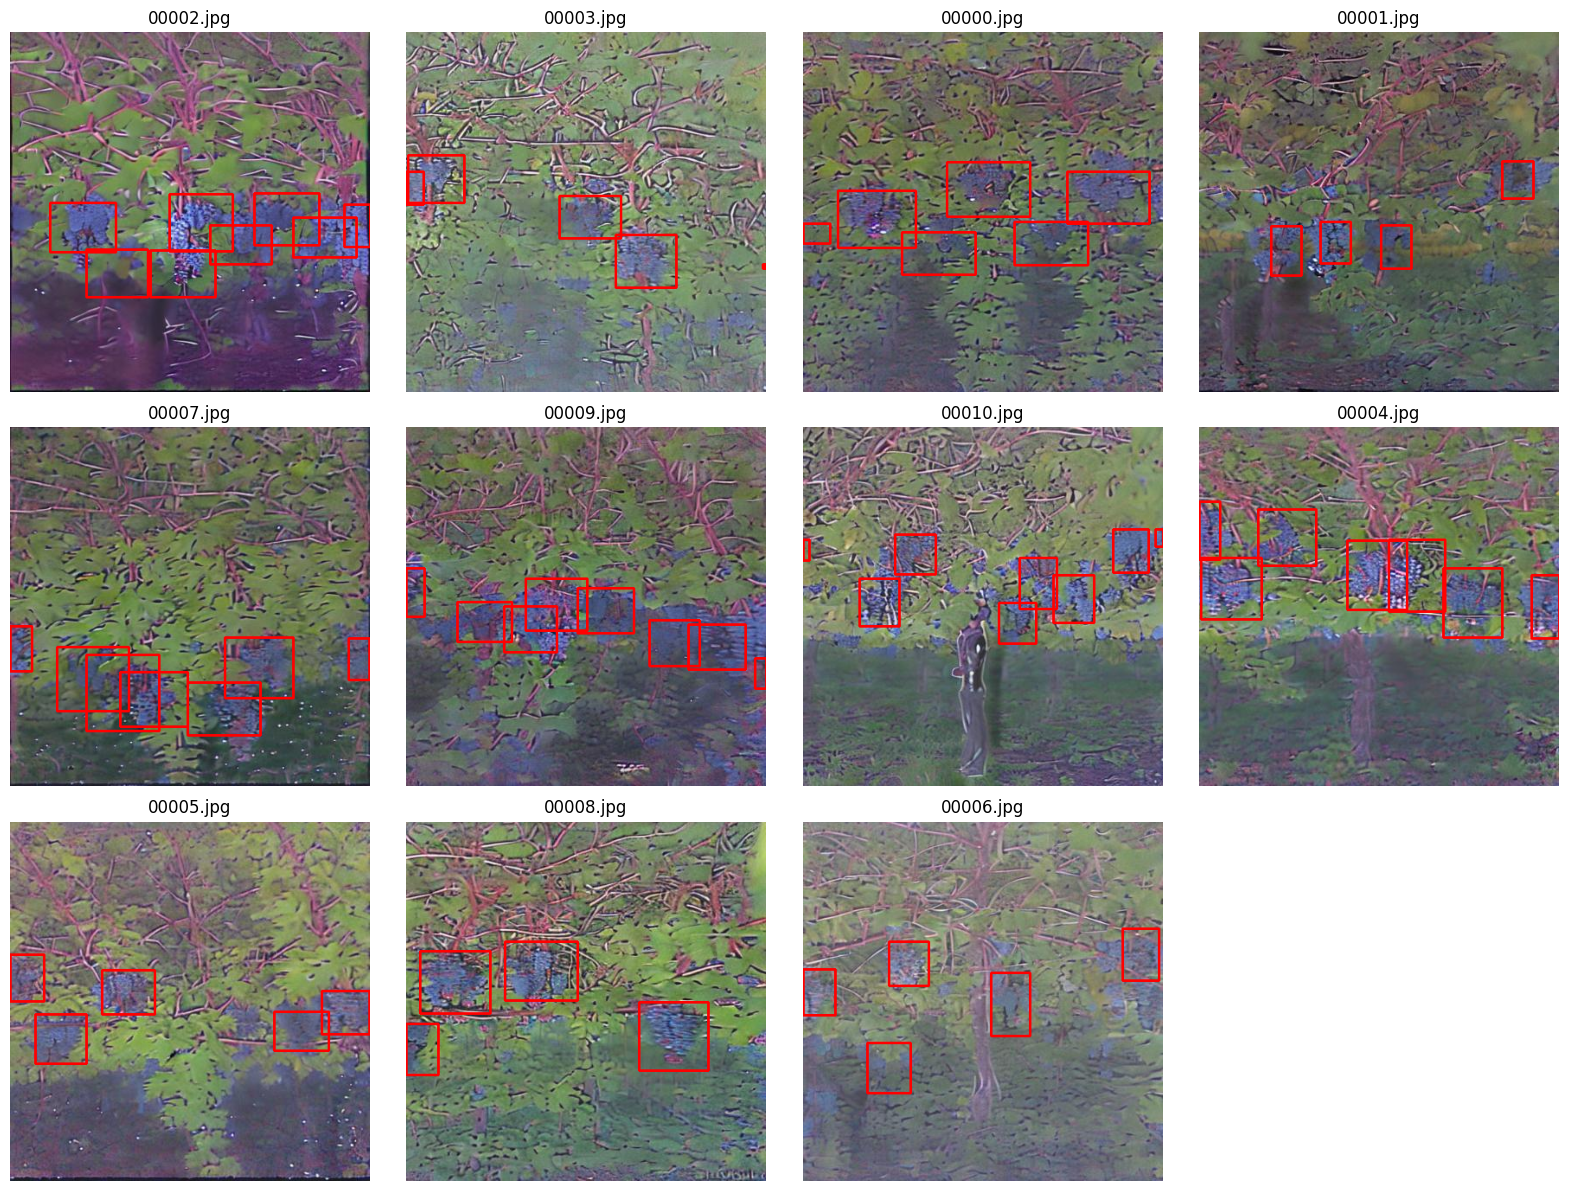

In [3]:
display_random_images_with_labels(
    image_dir='/group/jmearlesgrp/intermediate_data/eranario/AGILE/borden_syn2night/agile/test/attention_guidance_0', 
    label_dir='/group/jmearlesgrp/data/AGILE-Datasets/Grape-Detection/Synthetic/labels_subset'
)